# Model 1 - Deep Learning - Our Implementation of a Keras Neural Network

##  Making the Data and Preparing to Analyze

In [2]:
"""BreastCancerAI (c) by Roi Dvir
BreastCancerAI is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License.
You should have received a copy of the license along with this work. If not, see <http://creativecommons.org/licenses/by-nc-nd/4.0/>."""


# Importing packages
import numpy as np # To do calculations with ndarrays
import pandas as pd # To create a confusion matrix data frame
import matplotlib.pyplot as plt # To visualize the model and the confusion matrix
import seaborn as sn # To create a heatmap from the confusion matrix
# Importing Sklearn modules for processing data
from sklearn.utils import shuffle # To shuffle the data before the model starts to learn
from sklearn.model_selection import train_test_split # To split the data into train data and test/validation data
from sklearn.preprocessing import StandardScaler # To scale/normalize (standardize) the data (by fitting to train samples)
from sklearn.metrics import confusion_matrix, roc_curve, auc # To make a confusion matrix
# To set the backend of matplotlib to the 'inline' backend: With this backend, the output of plotting commands is displayed inline within frontends
%matplotlib inline

In [3]:
dataset = pd.read_csv('./data/Breast_Cancer_Data_CSV.csv') # Reading the dataset with panda, returned as two-dimensional data structure/data frame with labeled axes
dataset.drop(['ID number'], axis=1, inplace=True) # Dropping the feature ID since it has nothing to do with predicting cancer (or so we believe)
#The data doesn't contain NaNs/nulls, therefore there's no need to drop samples
print("Cancer diagnosis dataset dimensions: {}".format(dataset.shape)) # Printing shape size of dataset
dataset.head() # Displaying the upper part of the data frame, with the labels and numbering

Cancer diagnosis dataset dimensions: (569, 31)


,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concave points.mean,symmetry.mean,fractal dimension,...,texture.w,perimeter.w,area.w,smoothness.w,compactness.w,concavity.w,concave points.w,symmetry.w,fractal dimension.w,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


### <div dir="rtl"> נערבב את המידע כדי להימנע ממצב שהכל הדוגמאות מסוג אחד נמצאות בהתחלה וכל הדוגמאות מסוג שני נמצאות בסוף: </div>

In [3]:
dataset = shuffle(dataset) # Shuffle data to achieve randomal split between train data and test/validation data
# Split dataframe into two based on diagnosis
target_samples_data = dataset.pop('Diagnosis') # Popping the target values out of the dataset to targets
print("Cancer diagnosis dataset dimensions: {}".format(dataset.shape)) # Printing shape size of dataset
feature_samples_data = dataset # feature_samples becomes the new dataset which contains the feature samples without the target values

Cancer diagnosis dataset dimensions: (569, 30)


In [4]:
print(target_samples_data.unique()) # Printing the unique target elements
target_samples_data = target_samples_data.map({'M': 1, 'B': 0}) # Encoding categorical target values
print(target_samples_data.unique()) # Printing the new unique target elements

['B' 'M']
[0 1]


In [5]:
# Splitting dataset into training data and validation data consistently (due to random_state = 0) # The validation data is the test data and vice versa
# Because we already have a big enough validation set, the test set importance decreases and we can still do a quite accurate accuracy/performance and error evaluation
training_feature_samples_data, validation_feature_samples_data, training_target_samples_data, validation_target_samples_data = train_test_split(
    feature_samples_data, target_samples_data, test_size=0.13356, random_state=0)
scaler = StandardScaler().fit(training_feature_samples_data) # Fitting the scaler to the training data, to standard scale the rest of the data
training_feature_samples_data = scaler.transform(training_feature_samples_data) # Standardizing the training data
print(training_feature_samples_data.mean(axis=0)) # Printing standardized data mean of the training columns
validation_feature_samples_data = scaler.transform(validation_feature_samples_data) # Standardizing the validation data
print(validation_feature_samples_data.mean(axis=0)) # Printing standardized data mean of the validation columns

[ 3.60315789e-18  1.08094737e-17 -2.75641579e-16  4.72013683e-16
  5.76505262e-17 -3.60315789e-18  2.16189473e-17 -4.32378947e-17
 -4.86426315e-16  1.43045368e-15  5.58489473e-17  3.60315789e-18
 -9.00789472e-17  7.92694736e-17 -1.72951579e-16 -1.08094737e-17
  6.84599999e-17 -7.20631578e-18  2.19792631e-16 -9.36821051e-17
 -2.05380000e-16 -5.90917894e-16 -4.16164736e-16  1.31515263e-16
  1.31154947e-15  4.32378947e-17  5.76505262e-17  1.08094737e-16
  5.04442104e-17 -9.36821051e-17]
[-0.04830276  0.020481   -0.05612854 -0.04444661 -0.1303927  -0.1496896
 -0.14723517 -0.17136417 -0.06651285 -0.1144612  -0.07641845 -0.03346908
 -0.07714538 -0.04286553 -0.11676497 -0.14241848 -0.07107922 -0.18112737
 -0.14047124 -0.13313943 -0.09260158  0.05533212 -0.10400311 -0.10414936
 -0.14028792 -0.09897108 -0.10290612 -0.12946843 -0.12373988 -0.07199546]


In [6]:
def draw_confusion_matrix(y_true, y_pred, title='', printStats=True, plot_figure=True):
    # https://en.wikipedia.org/wiki/Confusion_matrix
    # Creating a confusion matrix, counting the true and false predictions aside the actual real predictions (the targets) - values as percentage
    cm = confusion_matrix(y_true.ravel(), np.round(y_pred).ravel())
    # Creating a two-dimensional panda data structure/data frame with labeled axes from the confusion matrix - values are number of samples
    conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

    # Assigning values to each prediction rate value:
    total = cm.sum() # Total human subjects - women that participated
    TN = cm[0, 0] / total # True Negative- Predicted Negative as a true value
    TP = cm[1, 1] / total # True Positive- Predicted Positive as a true value
    # https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#False_positive_and_false_negative_rates
    # https://en.wikipedia.org/wiki/False_positives_and_false_negatives#false_negative_rate
    FN = cm[1, 0] / total # False Negative- Predicted Negative as a false value
    FP = cm[0, 1] / total # False Positive- Predicted Positive as a false value, # https://en.wikipedia.org/wiki/False_alarm
    P = TP + FN # Condition Positive
    N = FP + TN # Condition Negative

    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # https://en.wikipedia.org/wiki/Accuracy_and_precision
    # https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
    accuracy = (TN + TP)
    precision = TP / float(TP + FP)
    sensitivity = TP / float(P) # https://en.wikipedia.org/wiki/Hit_rate
    specificity = TN / float(N)
    negative_predictive_value = TN / float(TN + FN)

    # Misclassification = 1 - Acuuracy
    # False Discovery Rate = 1 - precision, # https://en.wikipedia.org/wiki/False_discovery_rate
    # Miss Rate = 1 - Sensitivity
    # Fall Out = 1 - Specificity, # https://en.wikipedia.org/wiki/False_positive_rate, # https://en.wikipedia.org/wiki/Information_retrieval#Fall-out
    # False Omission Rate = 1 - Negative Predictive Value, # https://www.fxsolver.com/browse/formulas/False+Omission+Rate

    prevalence = (TP + FN) # Prevalence of breast cancer among the checked group, # https://en.wikipedia.org/wiki/Prevalence

    # https://en.wikipedia.org/wiki/Likelihood_ratios_in_diagnostic_testing#negative_likelihood_ratio
    positive_likelihood_ratio = sensitivity / float(1 - specificity)
    negative_likelihood_ratio = (1 - sensitivity) / float(specificity)
    diagnostic_odds_ratio = positive_likelihood_ratio / float(negative_likelihood_ratio) # https://en.wikipedia.org/wiki/Diagnostic_odds_ratio

    # https://en.wikipedia.org/wiki/F1_score, # https://en.wikipedia.org/wiki/Harmonic_mean#Harmonic_mean_of_two_numbers
    F1_score = 2 * precision * sensitivity / float(precision + sensitivity)
    # https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    matthews_correlation_coefficient = (TP * TN - FP * FN) / float(((TP + FP) * P * N * (TN + FN))**0.5)
    # https://en.wikipedia.org/wiki/Youden%27s_J_statistic
    informedness = float(sensitivity + specificity - 1)
    # In statistics the concept of markedness is quantified as a measure of how much one variable is marked as a predictor or possible cause of another, and is also known as Δp (deltaP) in simple two-choice cases
    markedness = float(precision + negative_predictive_value - 1)

    # https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel()) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
    roc_auc = auc(fpr, tpr) # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc
    if (printStats):
        print('Accuracy  = %.3f    Precision = %.3f    Sensitivity = %.3f    Specificity = %.3f\nNegative Predictive Value = %.3f    Prevalence = %.3f    Positive Likelihood Ratio = %.3f    Negative Likelihood Ratio = %.3f    Diagnostic Odds Ratio = %.3f\nF1 Score = %.3f    Matthews Correlation Coefficient = %.3f    Informedness = %.3f    Markedness = %.3f    ROC AUC = %.3f' % (accuracy, precision, sensitivity, specificity, negative_predictive_value, prevalence, positive_likelihood_ratio, negative_likelihood_ratio, diagnostic_odds_ratio, F1_score, matthews_correlation_coefficient, informedness, markedness, roc_auc)) # Printing statistic values
    if (plot_figure):
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        sn.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[0]) # Creating heatmap from the panda dataframe
        axes[1].plot(fpr, tpr, label='ROC_AUC (area under curve) = %.3f' % (roc_auc)) # https://en.wikipedia.org/wiki/Receiver_operating_characteristic
        axes[1].plot([0, 1], [0, 1], 'r--')
        plt.title(title + ' | ROC AUC')
        axes[1].set_xlabel('FPR')
        axes[1].set_ylabel('TPR')
        plt.legend()
        plt.grid()
    metrics = pd.DataFrame(data=[accuracy, TP, TN, FP, FN, sensitivity, specificity, F1_score, roc_auc], index=['Accuracy', 'TP', 'TN', 'FP', 'FN', 'Sensitivity', 'Specificity', 'F1', 'ROC_AUC'])
    return metrics.T

In [7]:
def plot(figsize=(10, 10), data1=[], data2=[], data1_label='', data2_label='', title='', y_label='', x_label='', style1='b-', style2='r-'):
    # Plot training accuarcy & testing accuracy values
    plt.figure(figsize=figsize) # Setting the size of the figure on the screen
    plt.plot(data1, style1, label=data1_label) # Plotting the train accuarcy history of the model during the deep learning process
    plt.plot(data2, style2, label=data2_label) # Plotting the test/validation accuarcy history of the model during the deep learning process
    plt.title(title) # Setting the title of the graph
    plt.ylabel(y_label) # Setting the title of the y axis - Accuarcy
    plt.xlabel(x_label) # Setting the title of the x axis - Epoch
    plt.legend([data1_label, data2_label], loc='upper left') # Displaying a legend of the curves
    plt.grid(which='both') # Displaying grid lines
    plt.show() # Displaying the graph

## Our Generic Keras Deep Neural Network

In [8]:
def Deep_Learning_Model(training_feature_samples, training_target_samples, validation_data, epochs=48):
    #`Sequential` from `keras.models`
    #`Dense` from `keras.layers`
    #`ModelCheckpoint` from `keras.callbacks`
    import keras
    np.random.seed(0) # To remain consistent with the random numbers generator and with the shuffling process
    n = training_feature_samples.shape[1] # n = 30, number of features

    # Initialize the constructor
    model = keras.models.Sequential() #https://keras.io/models/sequential/
    # Add first hidden layer
    model.add(keras.layers.Dense(input_shape=(n, ), units=n + 2, activation="relu", name="Hidden_1")) # In: The shape of the input layer is passed to this layer n = 30, Out: n + 2 = 32 perceptrons that pass values by ReLU activation function and initial weights that will change with the learning
    # Add second hidden layer
    model.add(keras.layers.Dense(units=int((n + 2) / 2), activation='sigmoid', name="Hidden_2")) # In: The perceptrons count 32 of the previous hidden layer is passed to this layer, Out: int(( n+ 2) / 2) = 16 perceptrons that pass values by Sigmoid activation function and initial weights that will change with the learning
    # Add output layer
    model.add(keras.layers.Dense(units=1, activation='sigmoid', name="Output")) # Output layer, In: The perceptrons count int(( n+ 2) / 2) = 16 int of the previous hidden layer is passed to this layer, Out: 1 perceptron that returns the probability by using Sigmoid activation function
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc']) # The neural network will try to minimize the binary crossentropy loss using Stochastic Gradient Descent while monitoring and printing the accuarcy
    model.summary() # Printing the model's layers

    # callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto'), no longer useful after we found the best fit
    # callback = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=0, mode='max'), no longer useful after we found the best fit
    initial_weights = model.get_weights() # Saving the intial weights

    history = model.fit(x=training_feature_samples, y=training_target_samples, batch_size=1, epochs=epochs, verbose=0, validation_data=validation_data, shuffle=True) #callbacks=[callback], the training loop - see keras for farther details, returns history object containing the deails about the learning process
    final_weights = model.get_weights() # Saving the final weights
    print(history.params, "\n") # Printing the parameters on run

    print("TRAINING SCORE EVALUATION")
    # Predicts the probability of a training sample to be drawn from the "M"(=1) class and passes it to the confusion matrix that shows the statistics
    draw_confusion_matrix(y_true=training_target_samples, y_pred=model.predict(training_feature_samples), title="Training", printStats=True, plot_figure=True)
    print("Final loss: ", history.history['loss'][-1]) # Final loss of the training

    print("\n\nVALIDATION SCORE EVALUATION")
    # Predicts the probability of a validation sample to be drawn from the "M"(=1) class and passes it to the confusion matrix that shows the statistics
    draw_confusion_matrix(y_true=validation_data[1], y_pred=model.predict(validation_data[0]), title="Validation", printStats=True, plot_figure=True)
    print("Final validation loss: ", history.history['val_loss'][-1]) # Final validation loss

    # Displaying two graphs of the change of the accuarcy with the epochs and the change of the loss with the epochs
    plot(figsize=(10, 10), data1=history.history['acc'], data2=history.history['val_acc'], data1_label='Training',
         data2_label='Validation', title='Model Accuracy', y_label='Accuracy', x_label='Epoch')
    plot(figsize=(10, 10), data1=history.history['loss'], data2=history.history['val_loss'],
         data1_label='Training', data2_label='Validation', title='Model Loss', y_label='Loss', x_label='Epoch')
    return model, initial_weights, final_weights

# The Run

Using TensorFlow backend.
W0505 16:11:36.527623 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:36.842666 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:36.846535 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:36.855844 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:37.155965 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:37.222173 140443583657792 __init__.py:327] Limited tf.compat.v2.summary API due to missing TensorBoard installation.
W0505 16:11:37.555156 140443583657792 __init__.py:354] Limited tf.summary API due to missing TensorBoard installation.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_1 (Dense)             (None, 32)                992       
_________________________________________________________________
Hidden_2 (Dense)             (None, 16)                528       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
{'batch_size': 1, 'epochs': 48, 'steps': None, 'samples': 493, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']} 

TRAINING SCORE EVALUATION


/ext/anaconda-2019.03/lib/python3.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in double_scalars


Accuracy  = 1.000    Precision = 1.000    Sensitivity = 1.000    Specificity = 1.000
Negative Predictive Value = 1.000    Prevalence = 0.375    Positive Likelihood Ratio = inf    Negative Likelihood Ratio = 0.000    Diagnostic Odds Ratio = inf
F1 Score = 1.000    Matthews Correlation Coefficient = 1.000    Informedness = 1.000    Markedness = 1.000    ROC AUC = 1.000
Final loss:  0.011329054442213321


VALIDATION SCORE EVALUATION
Accuracy  = 0.974    Precision = 0.963    Sensitivity = 0.963    Specificity = 0.980
Negative Predictive Value = 0.980    Prevalence = 0.355    Positive Likelihood Ratio = 47.185    Negative Likelihood Ratio = 0.038    Diagnostic Odds Ratio = 1248.000
F1 Score = 0.963    Matthews Correlation Coefficient = 0.943    Informedness = 0.943    Markedness = 0.943    ROC AUC = 0.996
Final validation loss:  0.0699488184059431


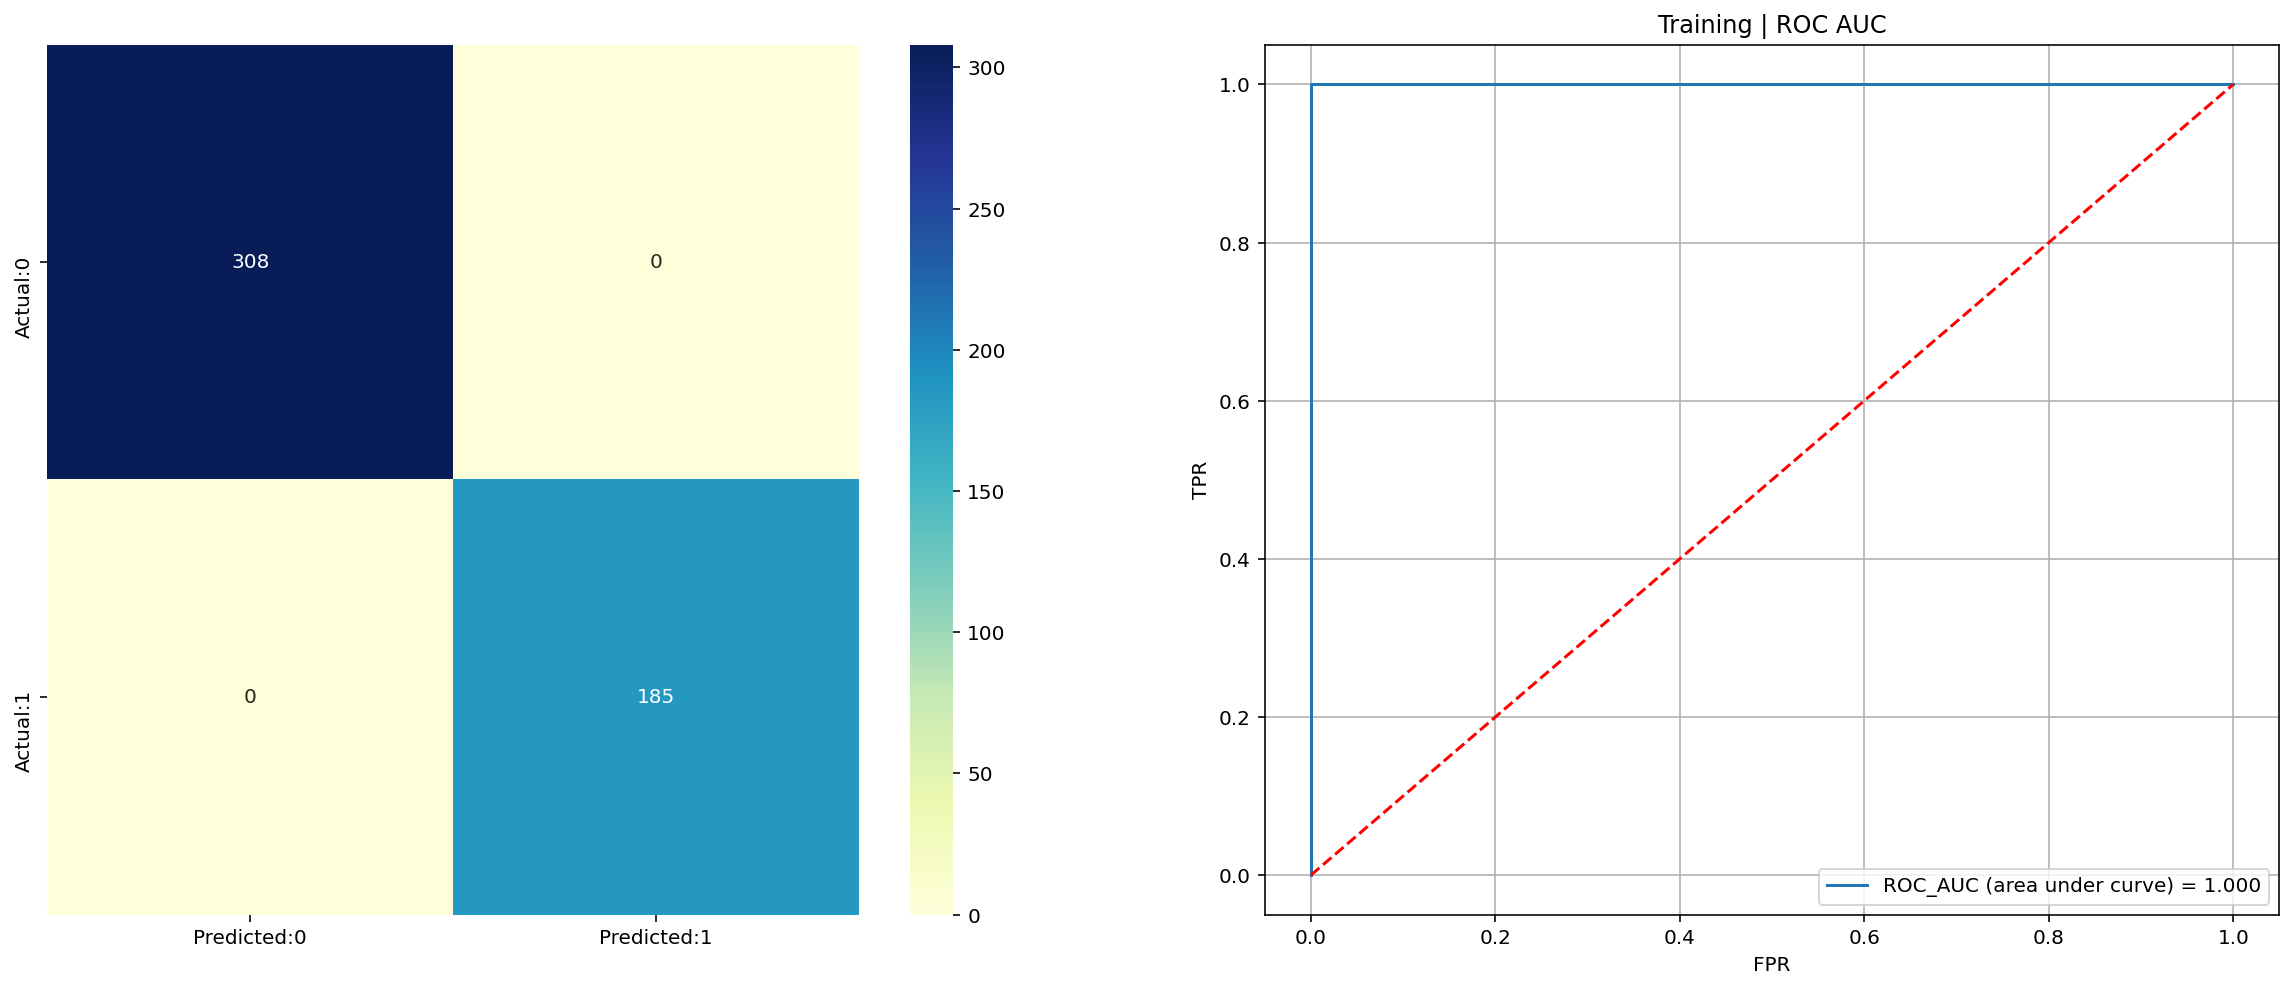

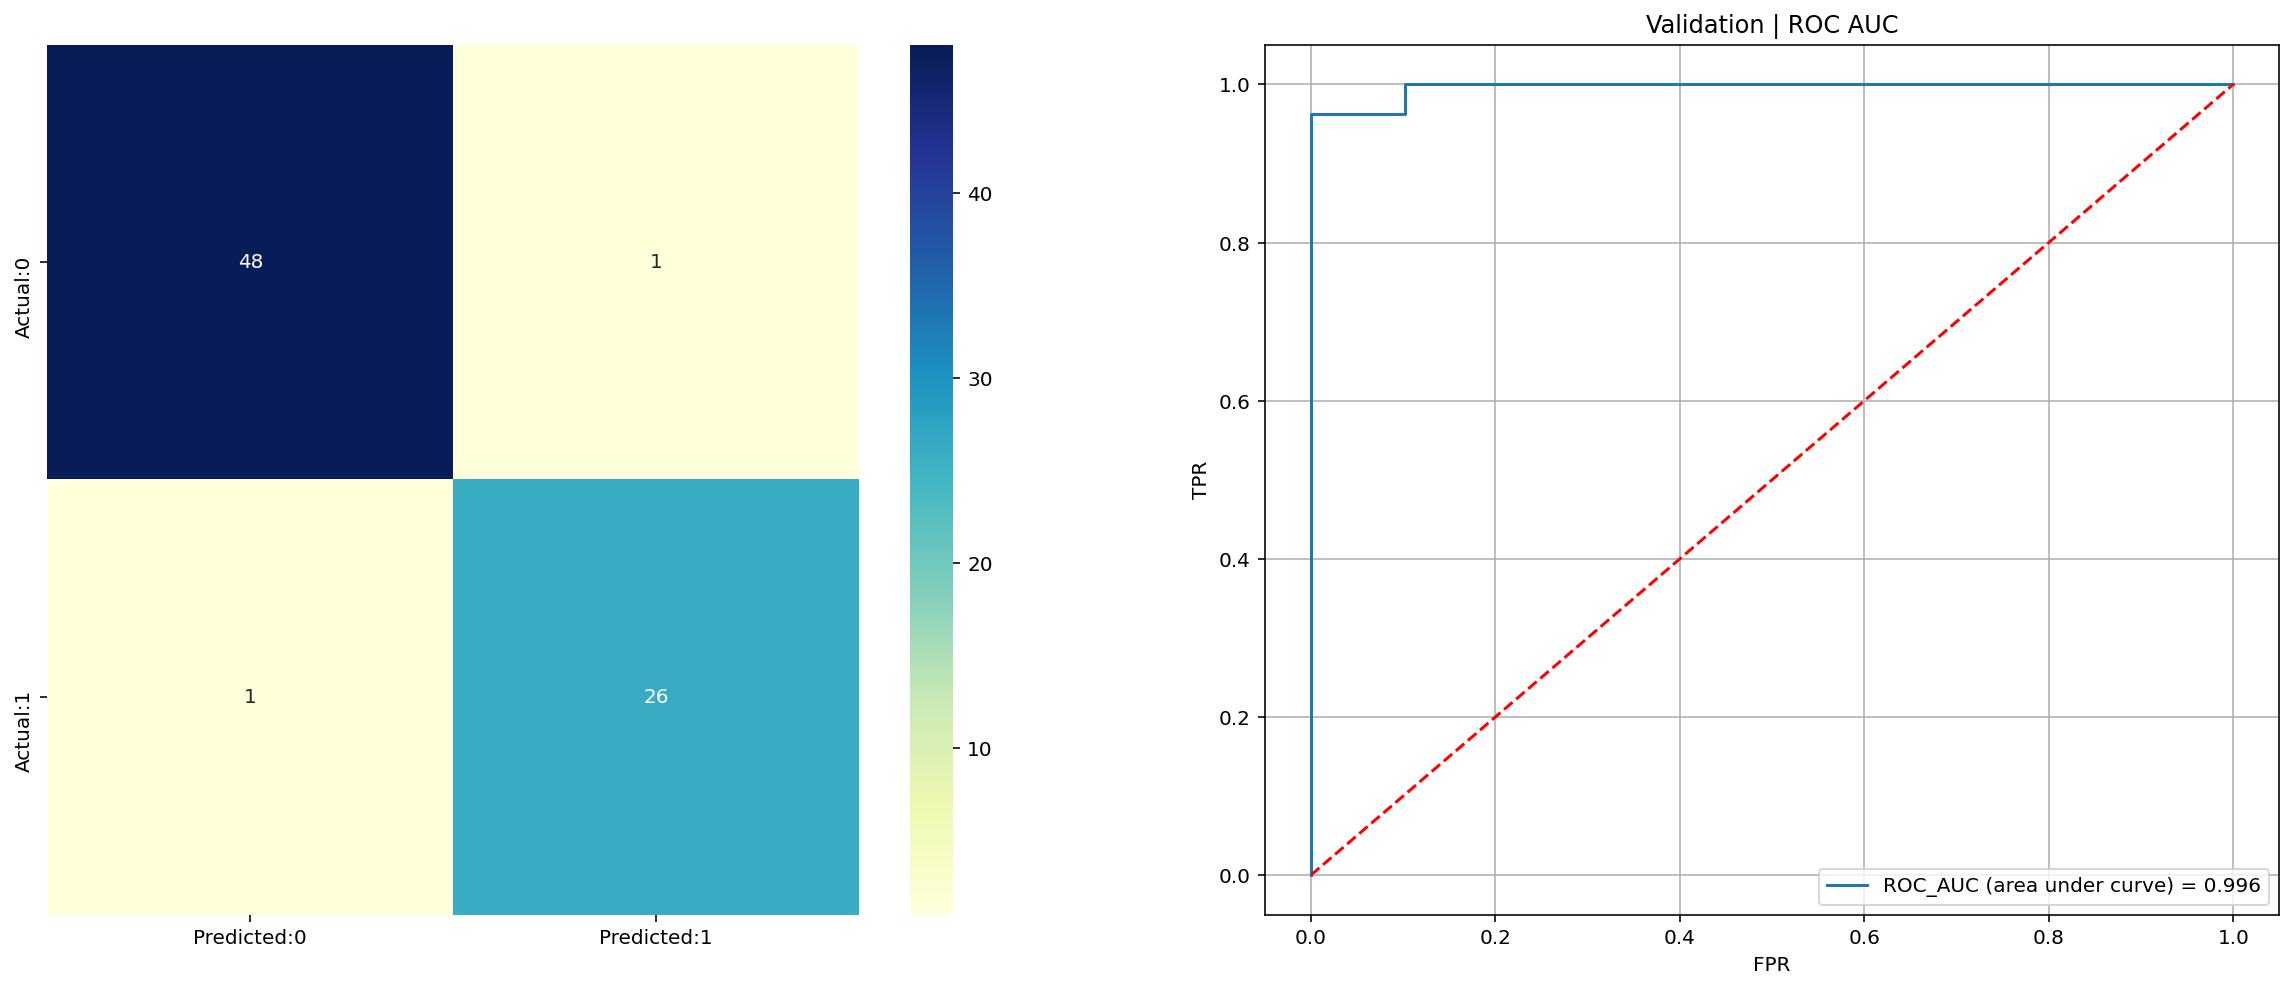

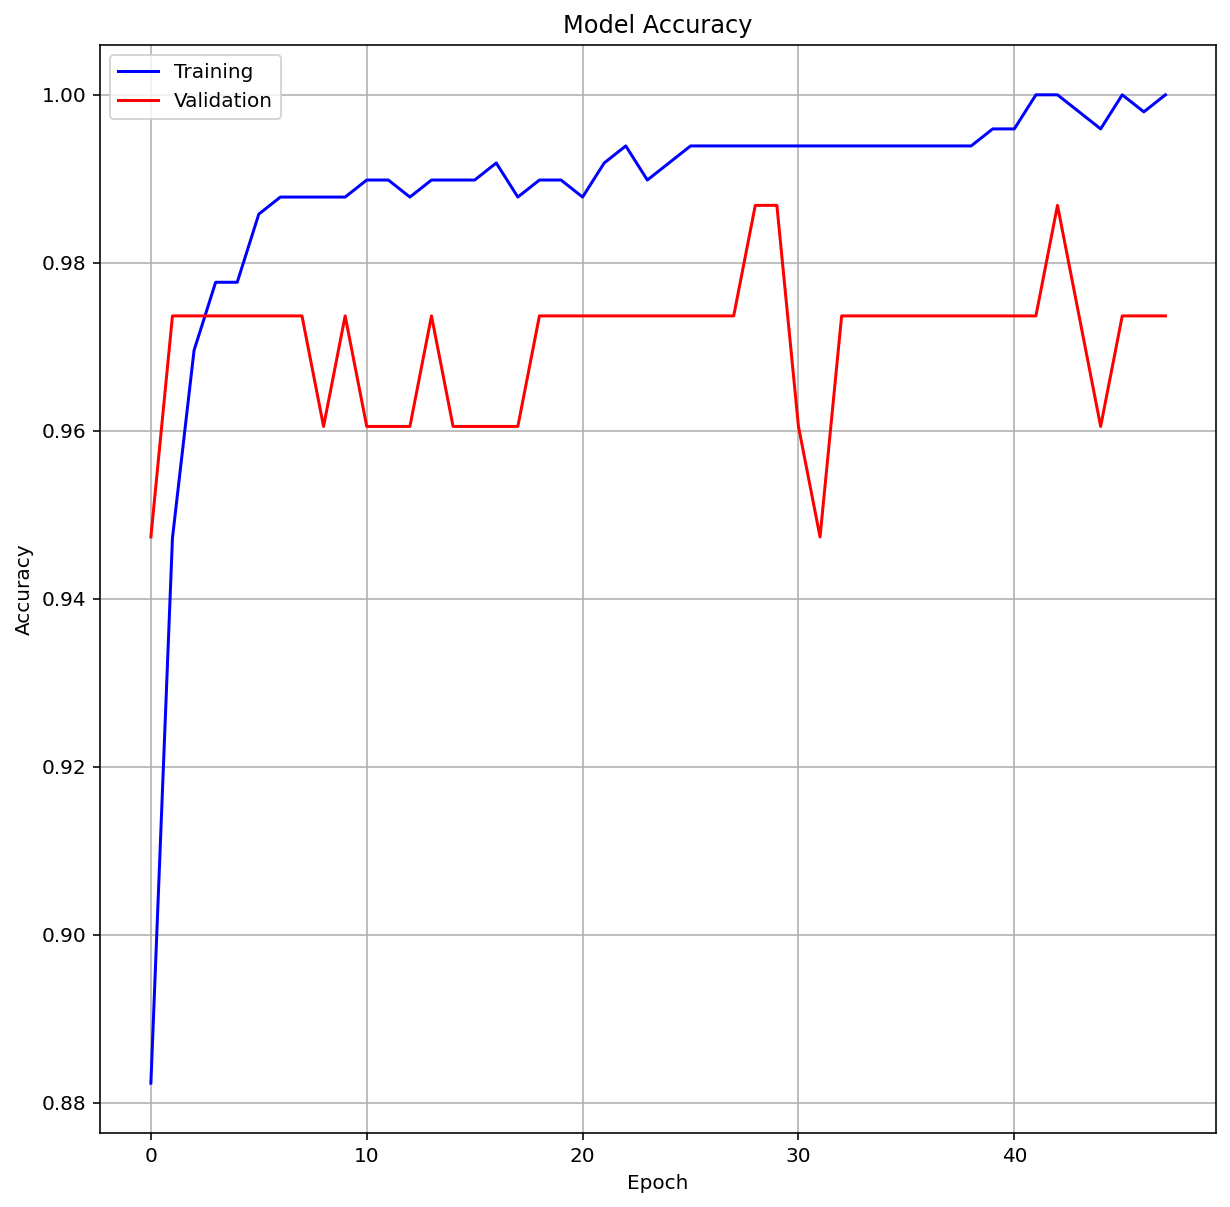

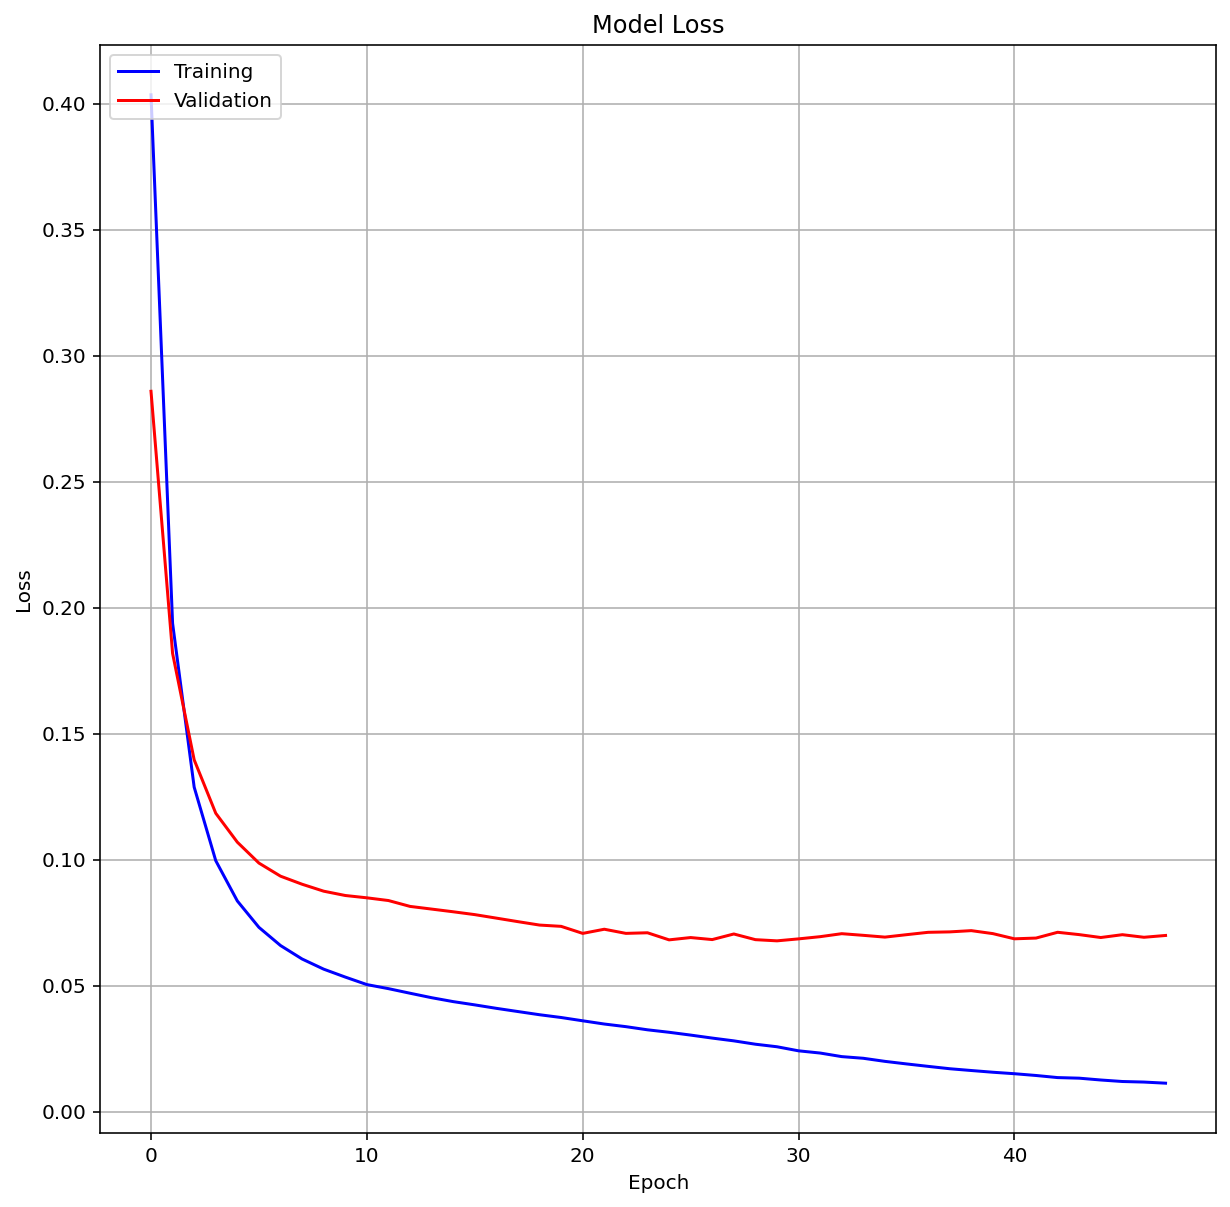

In [9]:
# The model has 100% accuracy most of the time, takes less than a minute to run
model, initial_weights, final_weights = Deep_Learning_Model(training_feature_samples=training_feature_samples_data, training_target_samples=training_target_samples_data, validation_data=[validation_feature_samples_data, validation_target_samples_data], epochs=48) # Returning the object of the keras model and weights
#print("\nInitial weights: \n", initial_weights, "\n") # Printing the intial weights that were used
#print("Final weights: \n", final_weights) # Printing the final weights after the learning process